In [54]:
import keras 
import tensorflow as tf
from keras.datasets import mnist #cargo los datos del mnist
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from numpy import genfromtxt
from keras.utils import to_categorical
from keras.datasets import mnist

In [55]:
#ok funciona bien
#funcion que hace reshape de las imagenes
#sin agregar el bias
def reshapeImages(x,y):
    im_shape = x.shape[1:]
    x = np.reshape(x,(x.shape[0],np.prod(im_shape)))
    return x,y

In [56]:
#definicion de constantes
n_clases = 10 #cantidad de clases
n_capa1 = 100 #cantidad de neuronas capa 1
n_capa2 = n_clases #cantidad de neuronas capa 2 (= cantidad de clases)
#importamos los datos de training y testing
(x_train,y_train),(x_test,y_test) = mnist.load_data() 
#preprocesado de los datos
mean = np.mean(x_train,axis=0)
#sigma = np.std(x_train,axis=0) algunos elementos son = 0, cambio por 255
sigma = 255.0
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
#reshaping y flatten
x_train,y_train = reshapeImages(x_train,y_train)
x_test,y_test = reshapeImages(x_test,y_test)
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)
n_dim = x_train.shape[1] #dimension de entrada
epocas = 100 #cantidad de epocas
#permutamos con el codigo de la guia
permutation = np.random.permutation(28*28)
x_train_perm = x_train.reshape(x_train.shape[0], -1)
x_train_perm = x_train_perm[:,permutation]
x_train_perm = x_train_perm.reshape(x_train.shape)
x_test_perm = x_test.reshape(x_test.shape[0], -1)
x_test_perm = x_test_perm[:,permutation]
x_test_perm = x_test_perm.reshape(x_test.shape)

In [4]:
#red neuronal solo con capas densas

In [11]:
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(units=n_capa1, activation='relu', use_bias=True, 
                           kernel_regularizer=keras.regularizers.l2(1e-5))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='softmax',use_bias=True,
                           kernel_regularizer=keras.regularizers.l2(1e-5))(l1)
model = keras.Model(inputs=x, outputs=l2)
optimizer = keras.optimizers.SGD(learning_rate=5e-3)
model.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])
history = model.fit(x_train_perm, yy_train, epochs=epocas, validation_data=(x_test_perm, yy_test),shuffle=True,batch_size=100, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 1.6058 - acc: 0.5749 - val_loss: 1.0854 - val_acc: 0.7733
Epoch 2/100
 - 2s - loss: 0.8676 - acc: 0.8096 - val_loss: 0.6766 - val_acc: 0.8497
Epoch 3/100
 - 2s - loss: 0.6145 - acc: 0.8543 - val_loss: 0.5249 - val_acc: 0.8731
Epoch 4/100
 - 2s - loss: 0.5059 - acc: 0.8725 - val_loss: 0.4494 - val_acc: 0.8856
Epoch 5/100
 - 2s - loss: 0.4455 - acc: 0.8835 - val_loss: 0.4038 - val_acc: 0.8942
Epoch 6/100
 - 2s - loss: 0.4063 - acc: 0.8906 - val_loss: 0.3727 - val_acc: 0.9000
Epoch 7/100
 - 2s - loss: 0.3783 - acc: 0.8961 - val_loss: 0.3496 - val_acc: 0.9039
Epoch 8/100
 - 2s - loss: 0.3568 - acc: 0.9006 - val_loss: 0.3317 - val_acc: 0.9071
Epoch 9/100
 - 2s - loss: 0.3395 - acc: 0.9047 - val_loss: 0.3171 - val_acc: 0.9104
Epoch 10/100
 - 2s - loss: 0.3251 - acc: 0.9082 - val_loss: 0.3048 - val_acc: 0.9130
Epoch 11/100
 - 2s - loss: 0.3128 - acc: 0.9114 - val_loss: 0.2942 - val_acc: 0.9149
Epoch 12/100
 - 2s - los

Epoch 97/100
 - 2s - loss: 0.1129 - acc: 0.9694 - val_loss: 0.1242 - val_acc: 0.9643
Epoch 98/100
 - 2s - loss: 0.1123 - acc: 0.9696 - val_loss: 0.1237 - val_acc: 0.9643
Epoch 99/100
 - 2s - loss: 0.1116 - acc: 0.9698 - val_loss: 0.1232 - val_acc: 0.9643
Epoch 100/100
 - 2s - loss: 0.1109 - acc: 0.9701 - val_loss: 0.1227 - val_acc: 0.9645


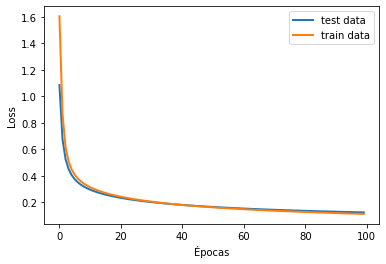

In [14]:
plt.plot(history.history['val_loss'],label='test data',linewidth=2)
plt.plot(history.history['loss'],label='train data',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
#plt.savefig('ej9_1_loss.pdf')

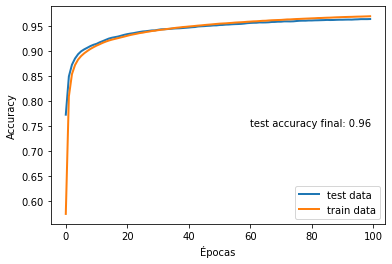

In [15]:
plt.plot(history.history['val_acc'],label='test data',linewidth=2)
plt.plot(history.history['acc'],label='train data',linewidth=2)
plt.legend()
plt.text(60,0.75,'test accuracy final: '+str(round(history.history['val_acc'][-1],2)))
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
#plt.savefig('ej9_1_acc.pdf')

In [ ]:
#red neuronal con capas convolucionales

In [61]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() 
train_shape = x_train.shape
test_shape = x_test.shape
#preprocesado de los datos
mean = np.mean(x_train,axis=0)
sigma = 255.0
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)
n_dim = x_train.shape[1] #dimension de entrada
epocas = 100 #cantidad de epocas
n_categorias = 10
#permutamos con el codigo de la guia
permutation = np.random.permutation(28*28)
x_train_perm = x_train.reshape(x_train.shape[0], -1)
x_train_perm = x_train_perm[:,permutation]
x_train_perm = x_train_perm.reshape(x_train.shape)
permutation = np.random.permutation(28*28)
x_test_perm = x_test.reshape(x_test.shape[0], -1)
x_test_perm = x_test_perm[:,permutation]
x_test_perm = x_test_perm.reshape(x_test.shape)

In [ ]:
x_train_perm = x_train_perm[...,tf.newaxis]
x_test_perm = x_test_perm[...,tf.newaxis]
epocas = 100
model = keras.Sequential()
model.add(keras.layers.Conv2D(16,(3, 3), activation='relu', padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['acc'])
history = model.fit(x_train_perm, yy_train, epochs=epocas, validation_data=(x_test_perm, yy_test),shuffle=True,batch_size=100, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 4s - loss: 0.5327 - acc: 0.8570 - val_loss: 3.0424 - val_acc: 0.0857
Epoch 2/100
 - 3s - loss: 0.2544 - acc: 0.9248 - val_loss: 3.3128 - val_acc: 0.0881
Epoch 3/100
 - 3s - loss: 0.2062 - acc: 0.9395 - val_loss: 3.3382 - val_acc: 0.0910
Epoch 4/100
 - 3s - loss: 0.1801 - acc: 0.9470 - val_loss: 3.6042 - val_acc: 0.0982
Epoch 5/100
 - 3s - loss: 0.1618 - acc: 0.9513 - val_loss: 3.5425 - val_acc: 0.1052
Epoch 6/100
 - 3s - loss: 0.1515 - acc: 0.9548 - val_loss: 3.7578 - val_acc: 0.1038
Epoch 7/100
 - 4s - loss: 0.1408 - acc: 0.9573 - val_loss: 3.7216 - val_acc: 0.1046
Epoch 8/100
 - 3s - loss: 0.1341 - acc: 0.9586 - val_loss: 3.8725 - val_acc: 0.1096
Epoch 9/100
 - 3s - loss: 0.1271 - acc: 0.9611 - val_loss: 3.9624 - val_acc: 0.1061
Epoch 10/100
 - 3s - loss: 0.1227 - acc: 0.9616 - val_loss: 4.3249 - val_acc: 0.1065
Epoch 11/100
 - 3s - loss: 0.1192 - acc: 0.9635 - val_loss: 4.1647 - val_acc: 0.1118
Epoch 12/100
 - 3s - los

In [ ]:
plt.plot(history.history['val_loss'],label='test data',linewidth=2)
plt.plot(history.history['loss'],label='train data',linewidth=2)
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
#plt.savefig('ej9_2_loss.pdf')

In [ ]:
plt.plot(history.history['val_acc'],label='test data',linewidth=2)
plt.plot(history.history['acc'],label='train data',linewidth=2)
plt.legend()
plt.text(60,0.90,'test accuracy final: '+str(round(history.history['val_acc'][-1],2)))
plt.xlabel('Épocas')
plt.ylabel('Accuracy') 
plt.savefig('ej9_2_acc.pdf')